# EV data - City of Austin 

### ref: Plug-In EVerywhere Level 2 Charging Station Network
link: https://data.world/cityofaustin/k5hp-eece
<hr>

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

# nan
import missingno as msno



In [2]:
ls ..

Archive/      Notes/        README.ipynb  clean_data/   data/
LICENSE       QGIS/         README.md     code/


In [3]:
df = pd.read_csv('../data/ev_locations/plug-in-everywhere-level-2-charging-station-network-1.csv')

In [4]:
df.shape

(467, 17)

In [5]:
df.head()

,Station Name,Address 1,Address 2,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Subcategory,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
0,CATHERINE / CATHERINE 1,300 Barton Springs Rd,NaN,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.259096, -97.747775)",$4.17/month PIE members $2/hr Non-Members,40A
1,AUSTIN HQ / STATION 1,4200 Smith School Dr,NaN,Austin,Texas,78744,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,General,J1772,240V,J1772,"(30.192647, -97.714329)",$4.17/month PIE members $2/hr Non-Members,40A
2,SCHOOL / AKINS1,10701 S 1st St.,NaN,Austin,Texas,78748,2,$4.17/month PIE members $2/hr Non-Members,"Public (Municipal, as in library, street, etc)",Education,High School / Other,J1772,240V,J1772,"(30.147634, -97.801294)",$4.17/month PIE members $2/hr Non-Members,40A
3,MONOGRAM / HANDICAP,615 W 7th St,NaN,Austin,Texas,78701,1,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,--,--,"(30.270571, -97.748993)",$4.17/month PIE members $2/hr Non-Members,40A
4,FLATIRON DOMAIN / FLATIRON DOM 2,10727 domain dr,NaN,Austin,Texas,78758,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.392852, -97.723729)",$4.17/month PIE members $2/hr Non-Members,40A


In [6]:
df.tail()

,Station Name,Address 1,Address 2,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Subcategory,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
462,AISD PAC / AISD PAC #5,1301-1603 E 51st St,NaN,Austin,Texas,78723,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Education,High School / Other,J1772,240V,J1772,"(30.305204, -97.702108)",$4.17/month PIE members $2/hr Non-Members,40A
463,HPI 3700 / EV 6,4339 N Capital of Texas Hwy,NaN,Austin,Texas,78746,1,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,General,J1772,--,--,"(30.336616, -97.8076)",$4.17/month PIE members $2/hr Non-Members,40A
464,PIE AE / PALMER STATION3,736-820 Barton Springs Rd,NaN,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Parking,Commercial,J1772,240V,J1772,"(30.259236, -97.751809)",$4.17/month PIE members $2/hr Non-Members,40A
465,ROSCOE PROPERTI / TRIO MAIN,2413-2433 S Pleasant Valley Rd,NaN,Austin,Texas,78741,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.228786, -97.726326)",$4.17/month PIE members $2/hr Non-Members,40A
466,DSMCUT / EVSE01 FLOOR L7,501-573 E 15th St,NaN,Austin,Texas,78701,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Healthcare,Hospital / Treatment Center,J1772,240V,J1772,"(30.275261, -97.73458)",$4.17/month PIE members $2/hr Non-Members,40A


<br>

<hr>

#### Unique Values per Feature

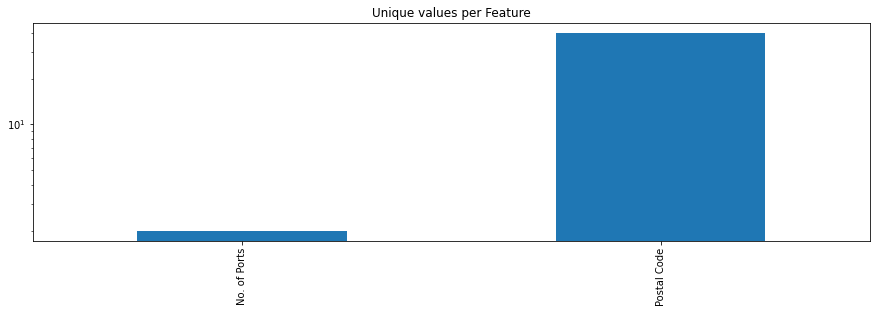

In [7]:
# See how many unique entries is in each numerical feature 
unique_values = df.select_dtypes(include= 'number').nunique().sort_values()

# Plot unique values with a y-axis in log-scale
unique_values.plot.bar(logy=True, figsize = (15,4), title='Unique values per Feature');


<br>

#### Check for Duplicates

In [8]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features
columns_to_consider = df.columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape


You seem to have 0 duplicates in your database.


(467, 17)

In [9]:
# check duplicates
dif = set(df.index) - set(df_X.index) 
dif

set()

<br>

#### Nan

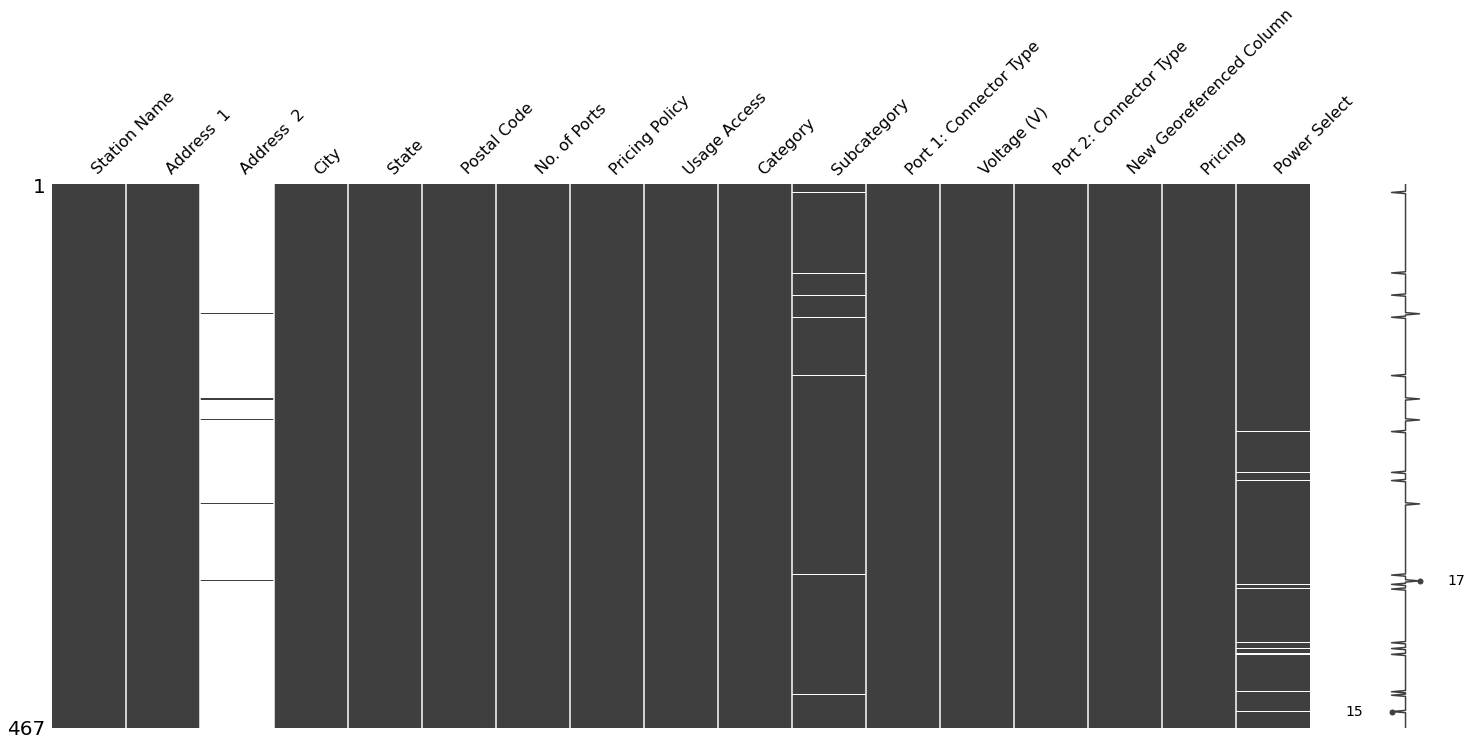

In [10]:
msno.matrix(df);

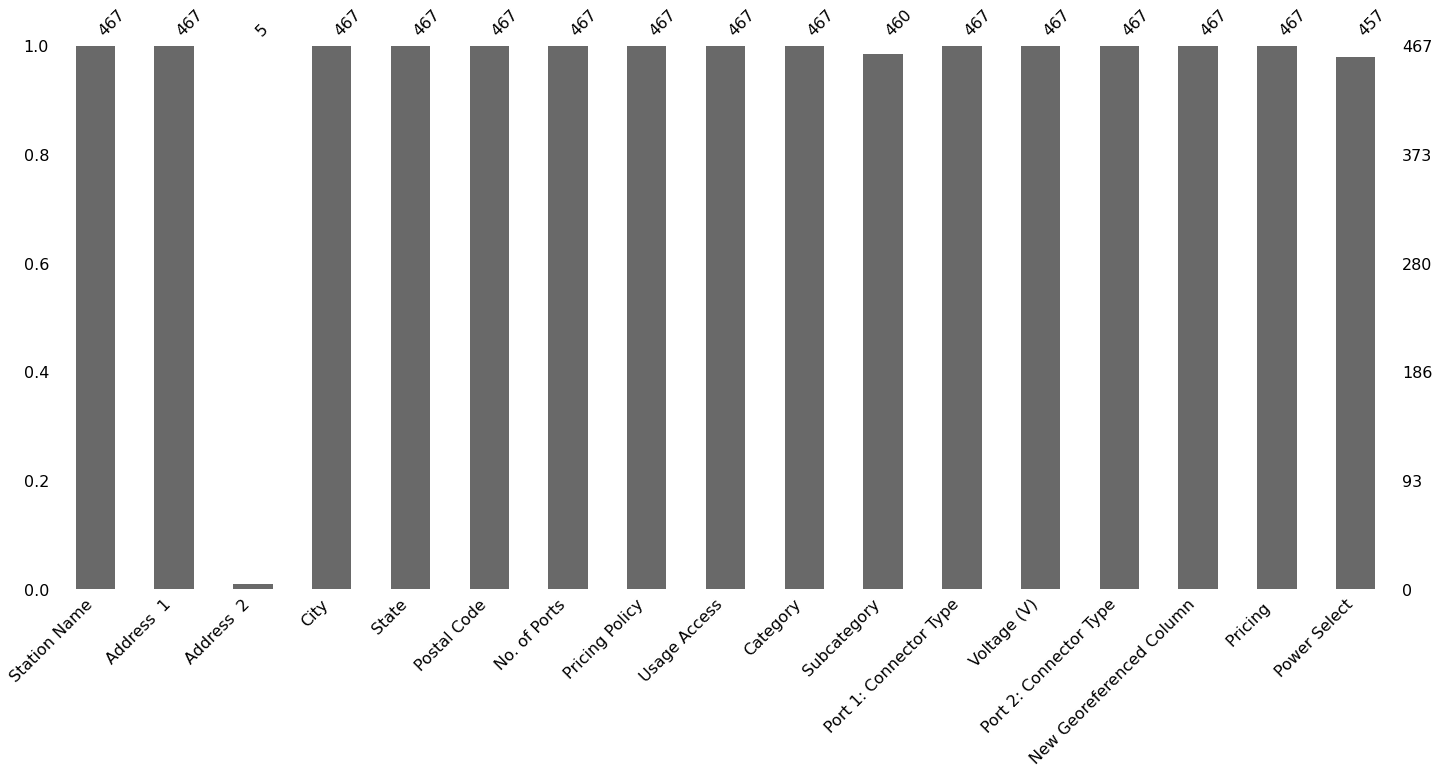

In [11]:
msno.bar(df);

<br>

#### Numerical Features

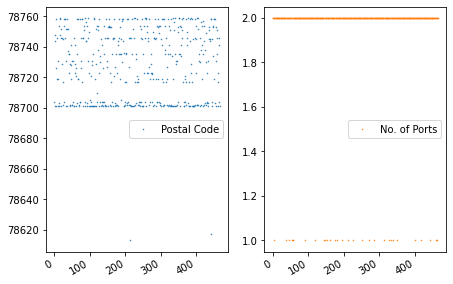

In [13]:
# 

df.plot(lw=0,
    marker='.',
    subplots=True,
    layout=(-1,4),
    figsize=(15,5),
    markersize=1);

<br>

#### Non-Numerical Features

In [14]:
# number of non-numerical features
df.select_dtypes(exclude=["number", "datetime"]).shape

(467, 15)

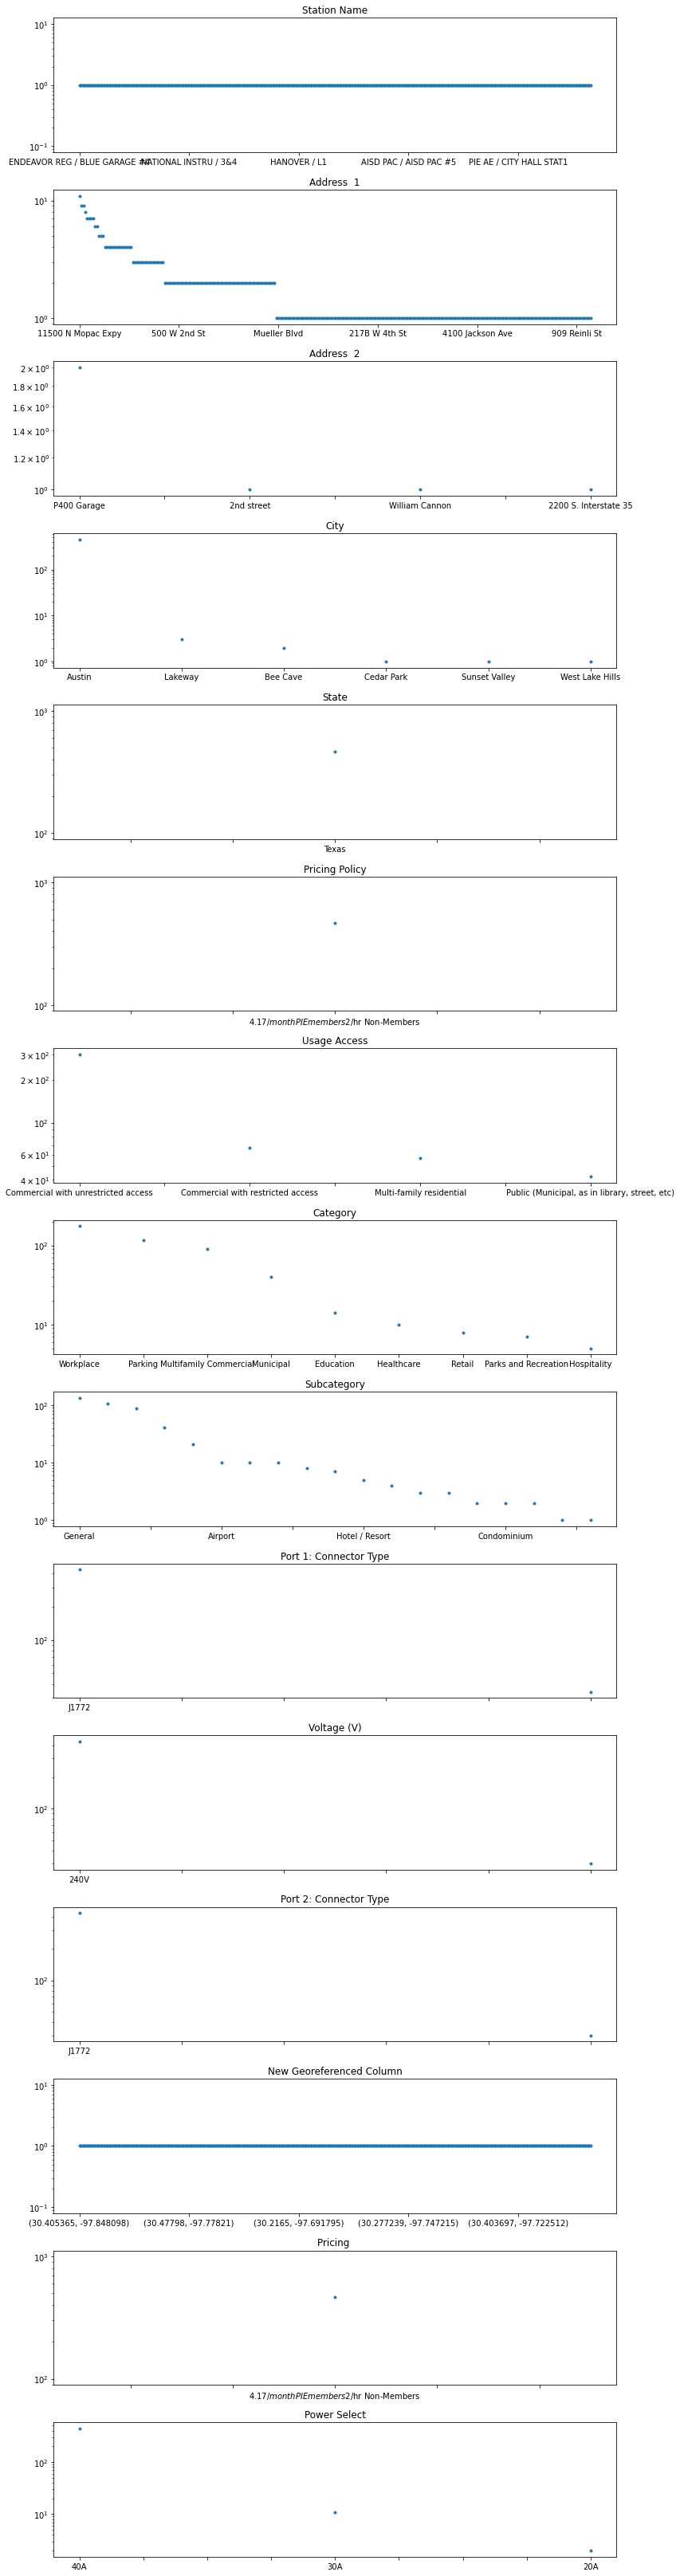

In [16]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=15, figsize=(12, 45))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

<br>

#### Feature Distrobution

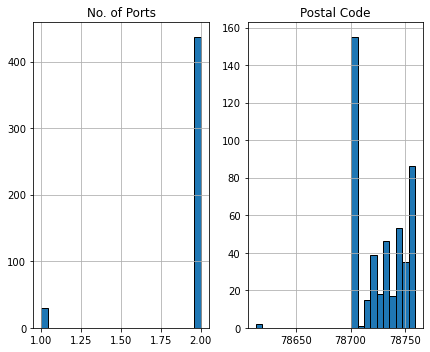

In [19]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [34]:
df.head(1).T

,0
Station Name,CATHERINE / CATHERINE 1
Address 1,300 Barton Springs Rd
Address 2,NaN
City,Austin
State,Texas
Postal Code,78704
No. of Ports,2
Pricing Policy,$4.17/month PIE members $2/hr Non-Members
Usage Access,Multi-family residential
Category,Multifamily Commercial


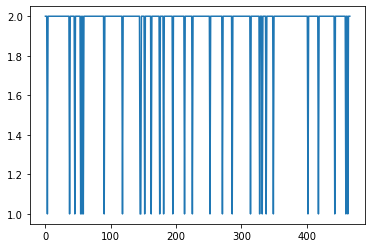

In [67]:
plt.plot(df['No. of Ports'] )

In [31]:
df.columns

Index(['Station Name', 'Address  1', 'Address  2', 'City', 'State',
       'Postal Code', 'No. of Ports', 'Pricing Policy', 'Usage Access',
       'Category', 'Subcategory', 'Port 1: Connector Type', 'Voltage (V)',
       'Port 2: Connector Type', 'New Georeferenced Column', 'Pricing ',
       'Power Select'],
      dtype='object')

In [ ]:
"""

- have a count for each column


- visulaize graph & GIS which belong to a particular category [by category / sub category, price ]



"""

<hr>

In [ ]:
df.sort_values()
pd.unique()

<br>

### Columns - POWER

In [25]:
# No. of Ports

print('normailzed')
print( df['No. of Ports'].value_counts(normalize= True)*100  )
print('Counts')
df['No. of Ports'].value_counts()

normailzed
2    93.576017
1     6.423983
Name: No. of Ports, dtype: float64
Counts


2    437
1     30
Name: No. of Ports, dtype: int64

In [39]:
# 'Voltage (V)'

df['Voltage (V)'].value_counts()

240V    437
--       30
Name: Voltage (V), dtype: int64

In [40]:
# Power Select

df['Power Select'].value_counts()

40A    444
30A     11
20A      2
Name: Power Select, dtype: int64

In [42]:
# 'Pricing Policy'

df['Pricing Policy'].value_counts()

$4.17/month PIE members $2/hr Non-Members    467
Name: Pricing Policy, dtype: int64

In [43]:
# 'Port 1: Connector Type'

df['Port 1: Connector Type'].value_counts()

J1772         433
NEMA 5-20R     34
Name: Port 1: Connector Type, dtype: int64

In [44]:
df['Port 2: Connector Type'].value_counts()

J1772    437
--        30
Name: Port 2: Connector Type, dtype: int64

<br>

### Columns - DEMOGRAPHIC

In [47]:
# Usage Access

df['Usage Access'].value_counts()

Commercial with unrestricted access               301
Commercial with restricted access                  67
Multi-family residential                           57
Public (Municipal, as in library, street, etc)     42
Name: Usage Access, dtype: int64

In [45]:
# Category

df['Category'].value_counts()

Workplace                 175
Parking                   117
Multifamily Commercial     91
Municipal                  40
Education                  14
Healthcare                 10
Retail                      8
Parks and Recreation        7
Hospitality                 5
Name: Category, dtype: int64

In [48]:
# Subcategory

df['Subcategory'].value_counts()

General                          134
Commercial                       107
Apartment                         89
High-Tech                         41
Municipal Fleet                   21
High School / Other               10
Hospital / Treatment Center       10
Airport                           10
Library                            8
Municipal Workplace                7
Hotel / Resort                     5
University / College               4
Municipal Parking                  3
Shopping Center                    3
Big Box / Superstore               2
Car Rental / Car Share             2
Condominium                        2
Parks and Recreation (Public)      1
Strip Mall                         1
Name: Subcategory, dtype: int64